In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

In [2]:
train_data= pd.read_csv('"D:\projects\Data S\house-prices-advanced-regression-techniques\train.csv"')

In [3]:
## separating the categorical features and numerical features
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

## Some Visualizations that help us understand the data

### Numerical Features Visuals

In [4]:
len(num_cols)

37

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb73148fd90>,
      dtype=object)

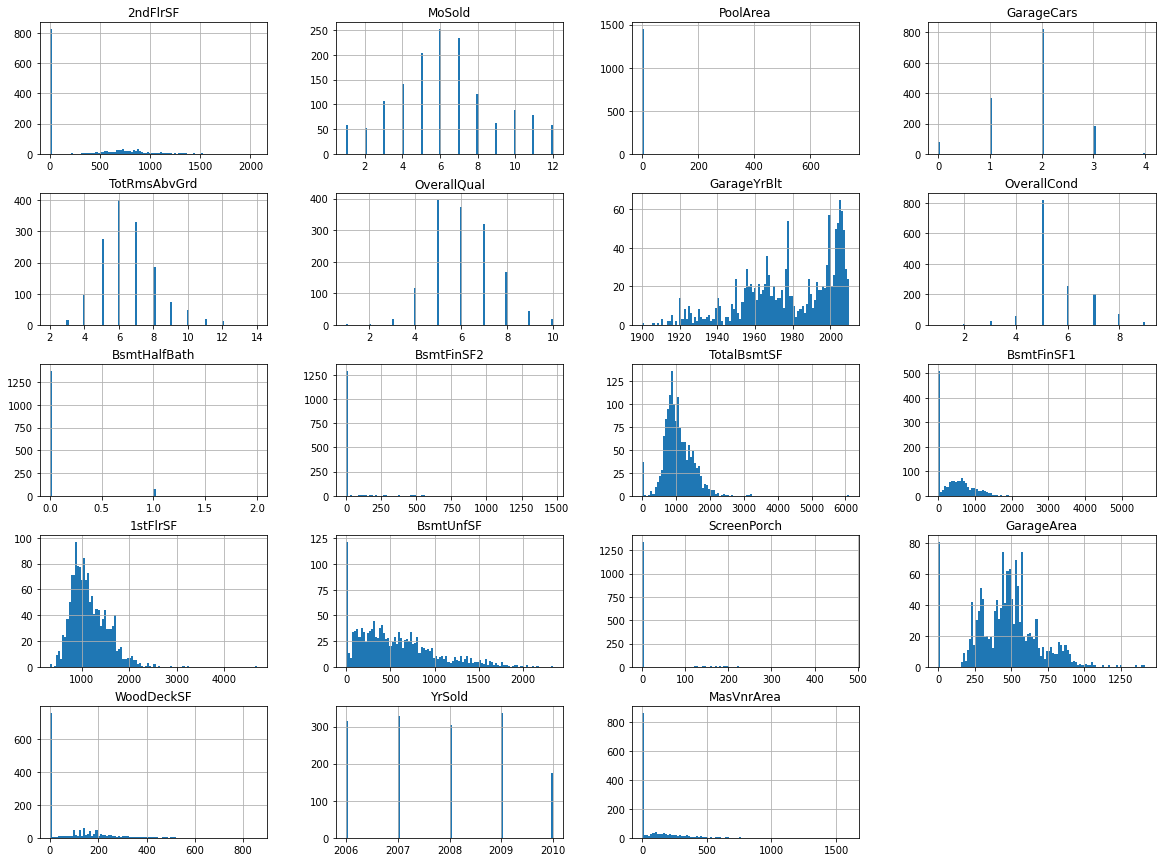

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[num_cols[:19]].hist(bins = 100, figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb72bf9cc90>,
      dtype=object)

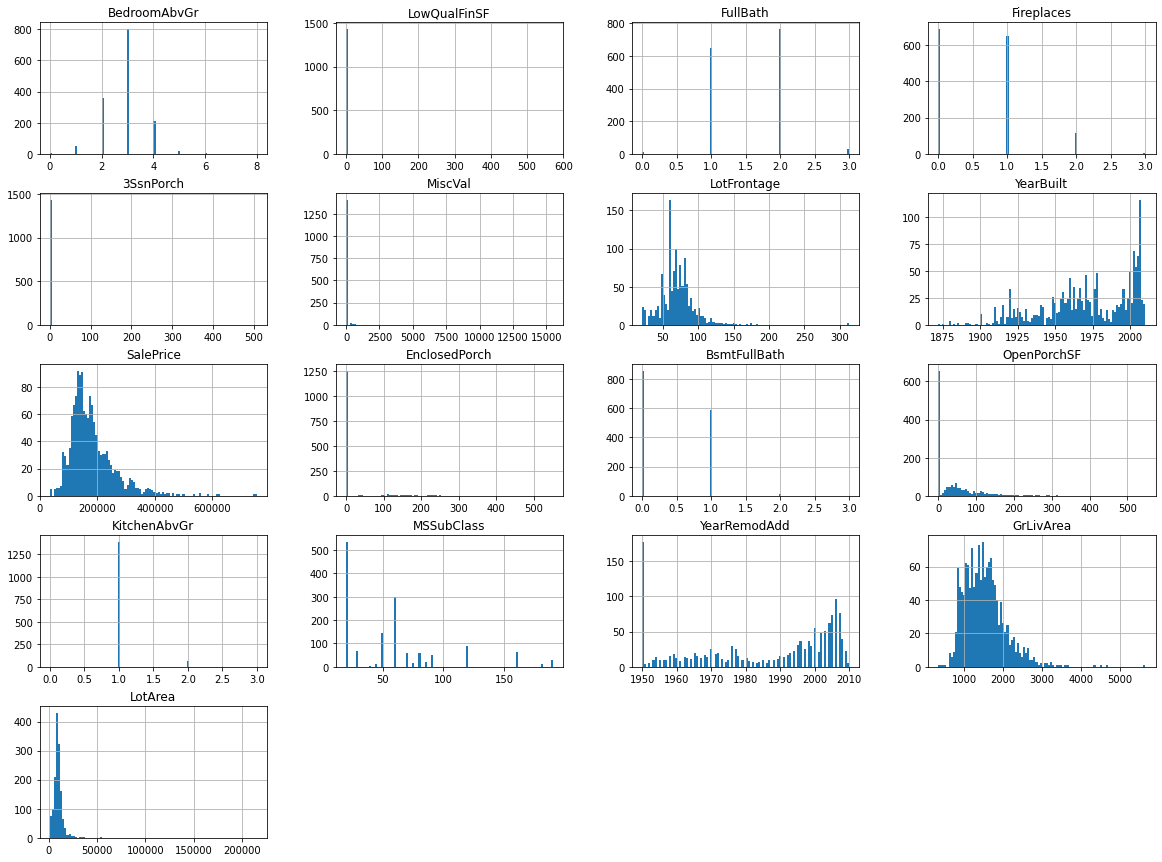

In [6]:
train_data[num_cols[20:]].hist(bins = 100, figsize = (20, 15))

In [7]:
corr_matrix = train_data[num_cols].corr()
# corr_matrix

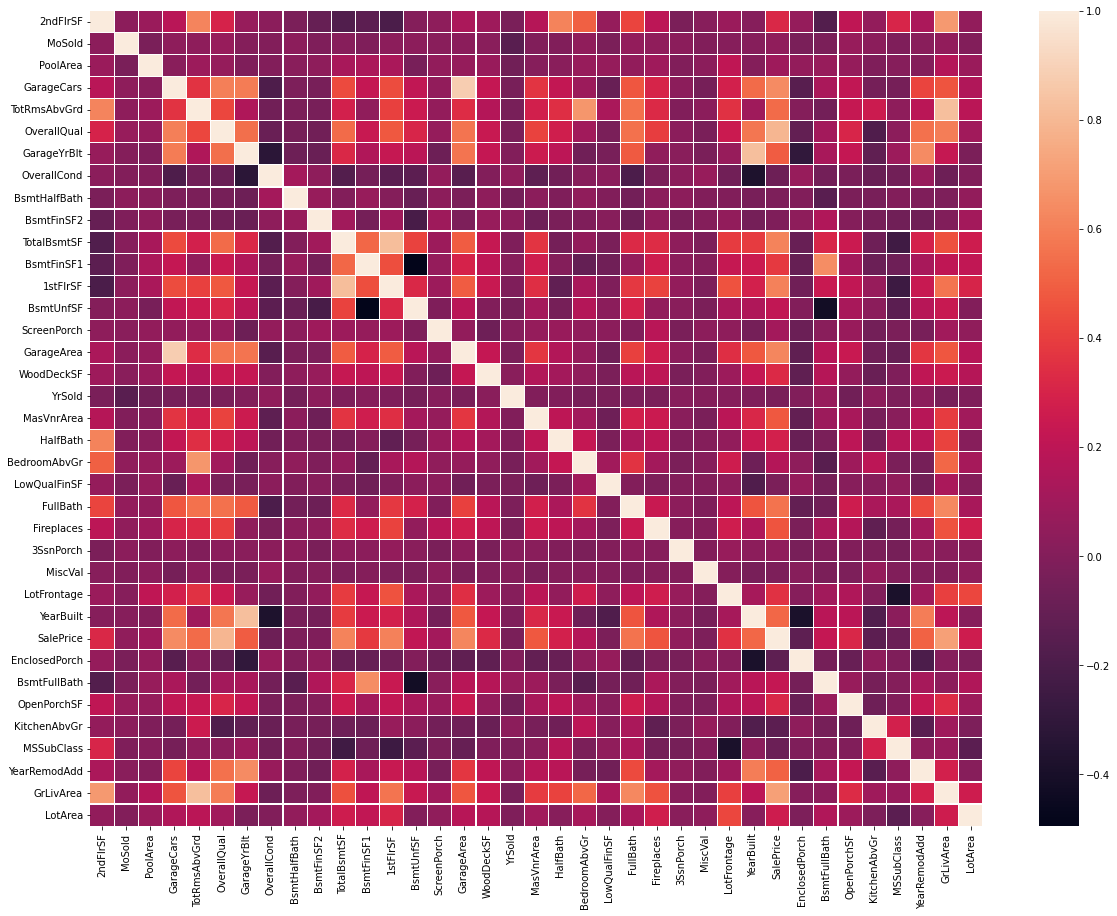

In [8]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

## Categorical Variables Visuals

In [9]:
#making dataframes each of them contains the categories of a catgegorical variable and theire frequencies
df_list=[]
for cat_column in cat_cols:
    df_list.append(train_data.groupby([cat_column])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

In [10]:
len(df_list)

43

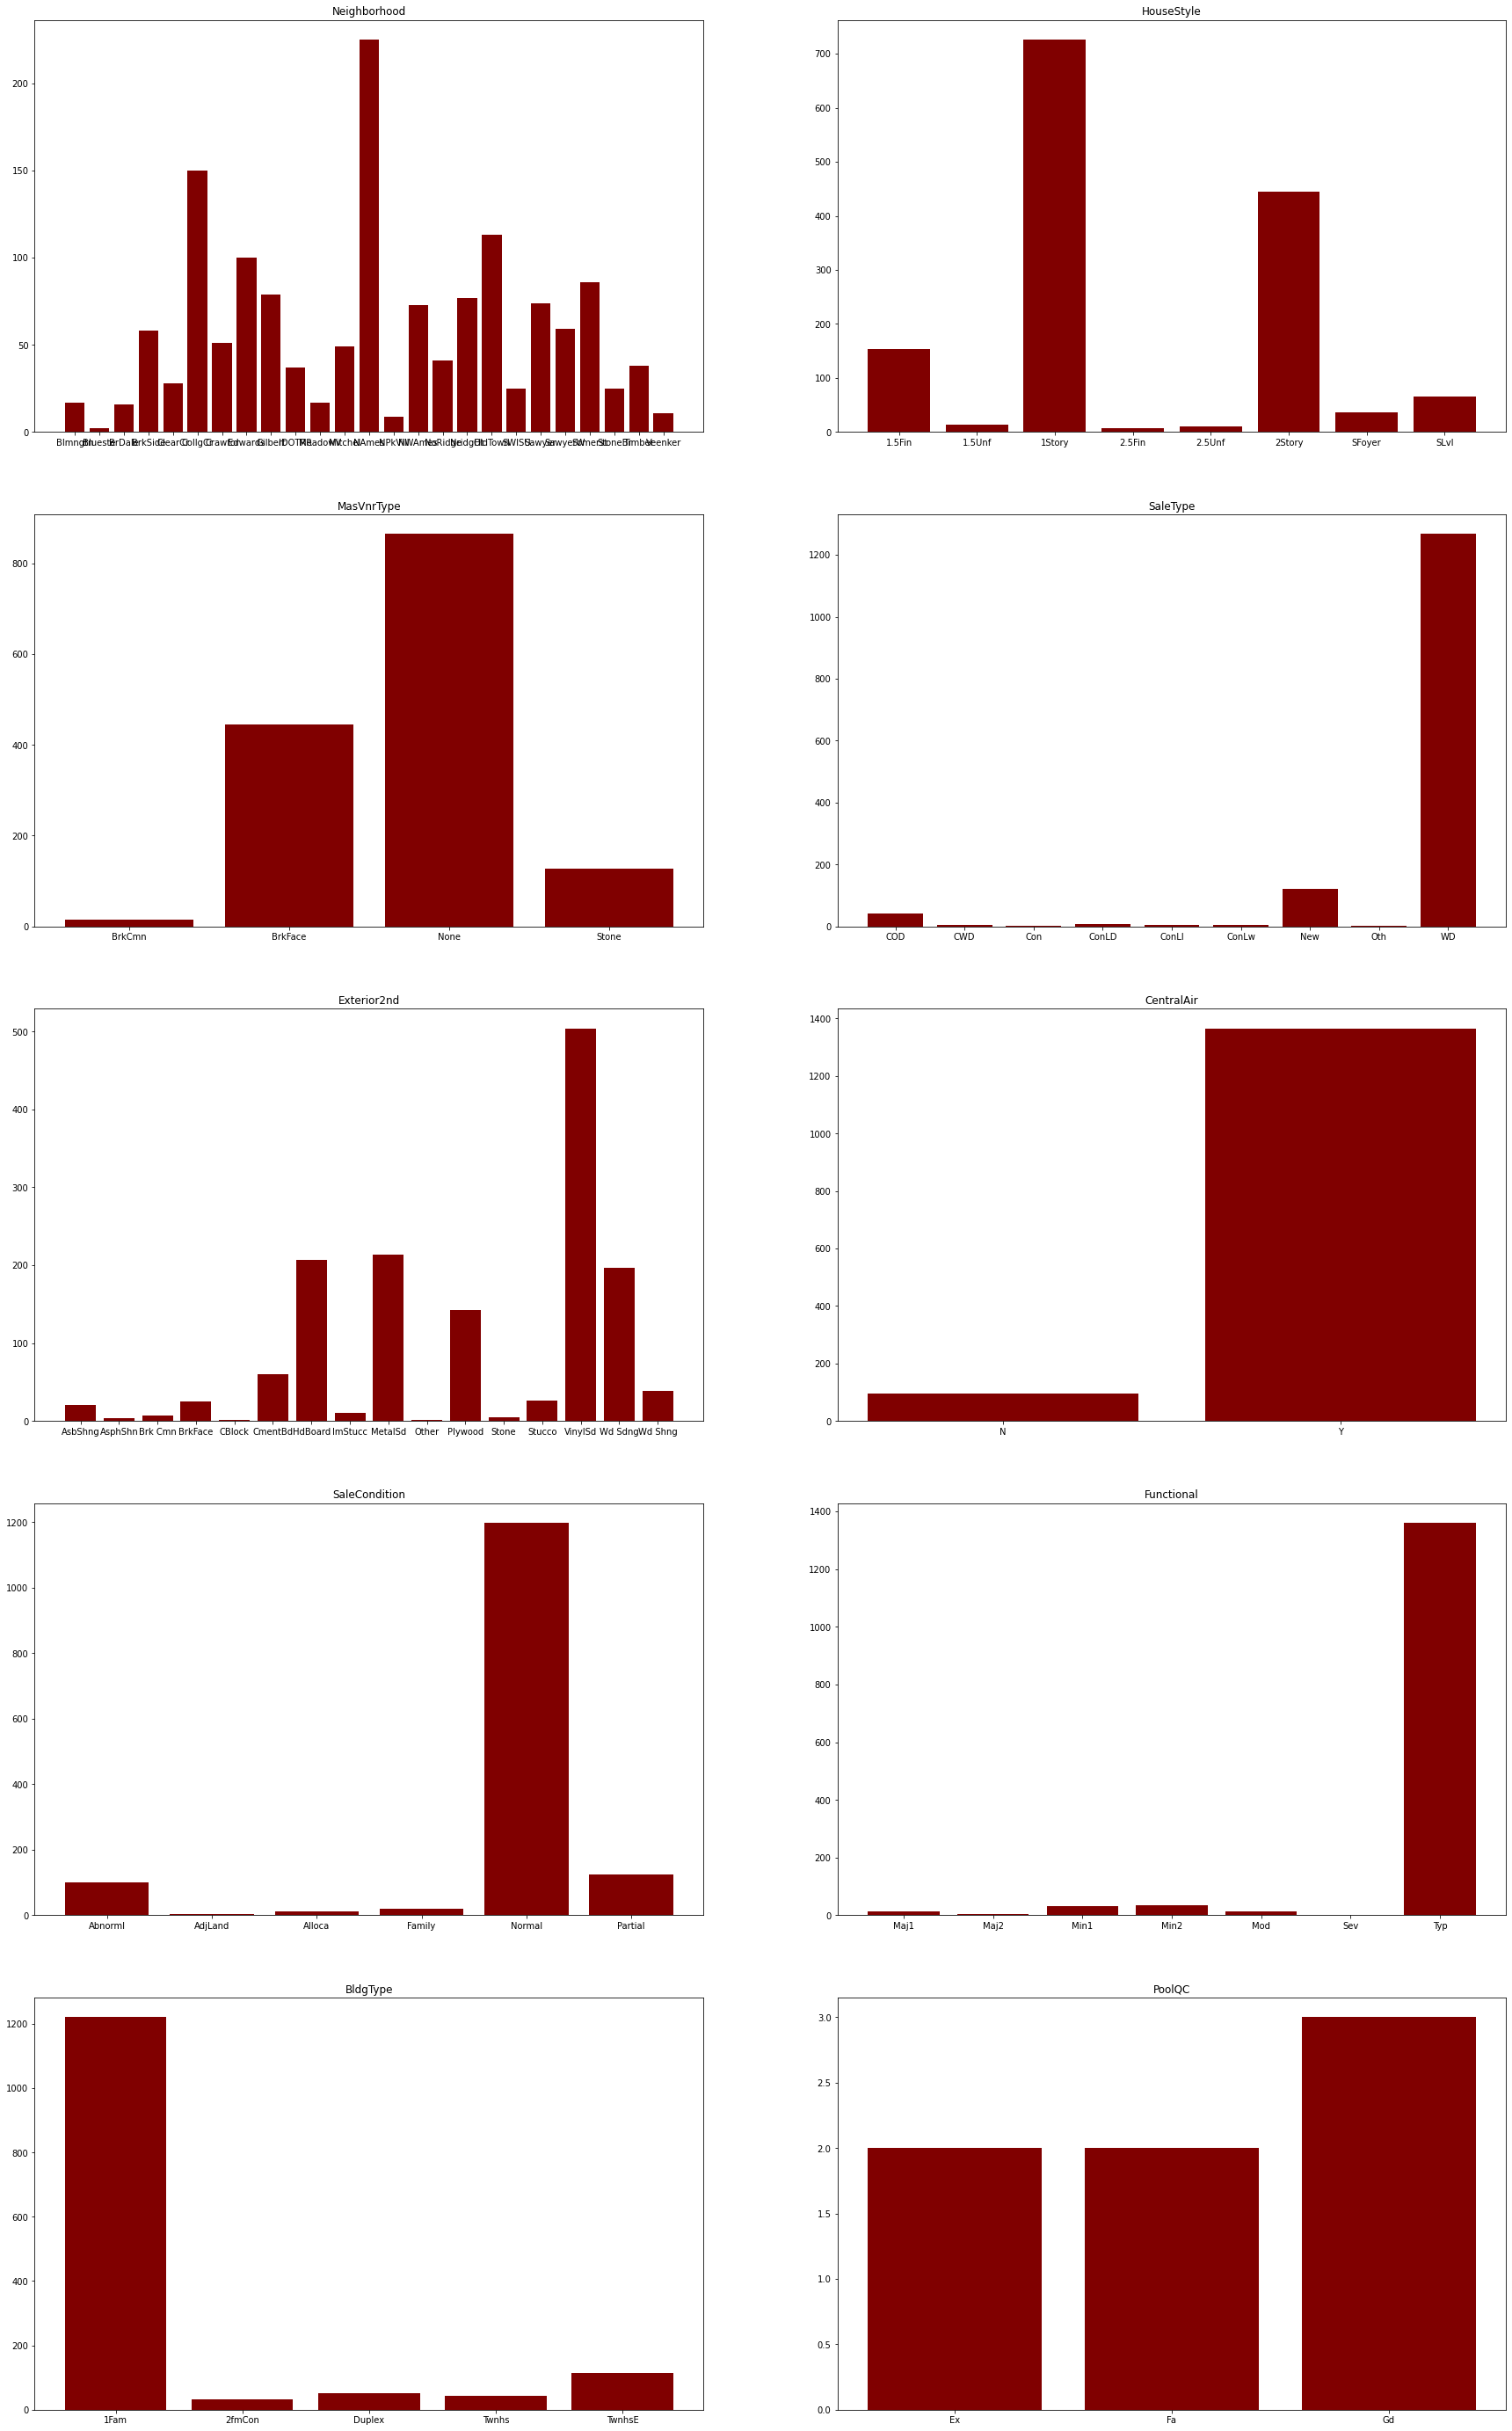

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[0:10]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

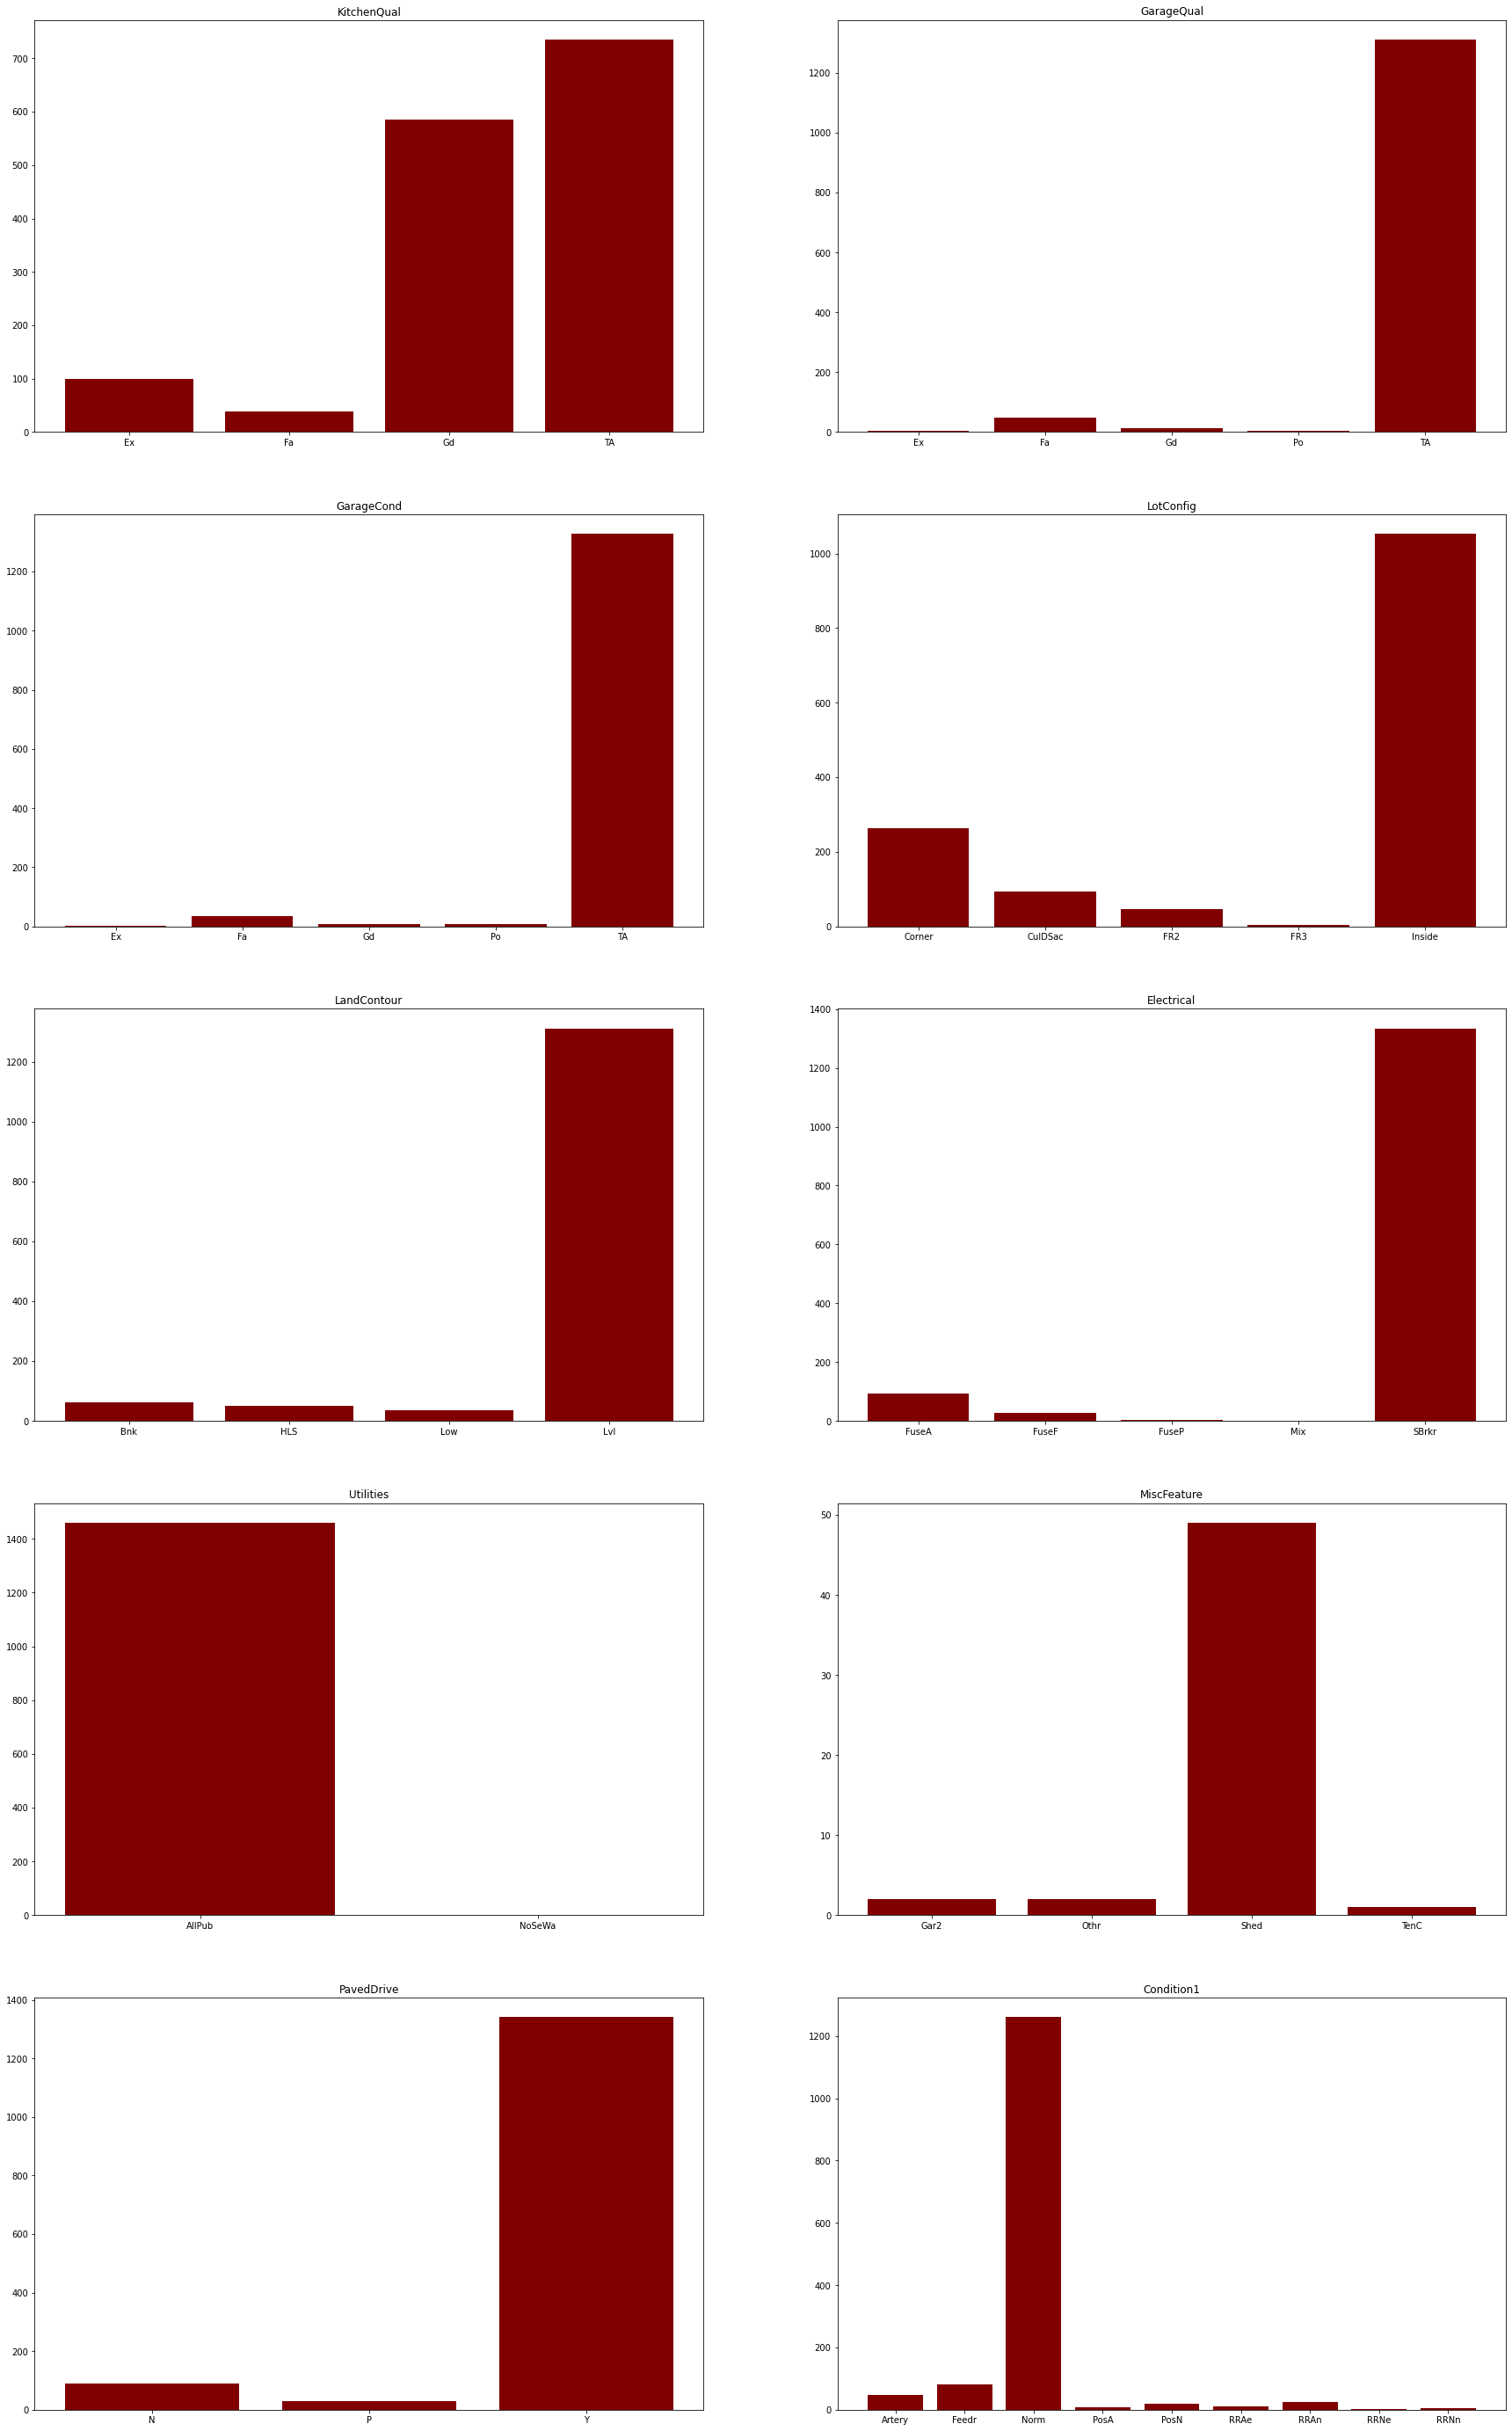

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[10:20]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

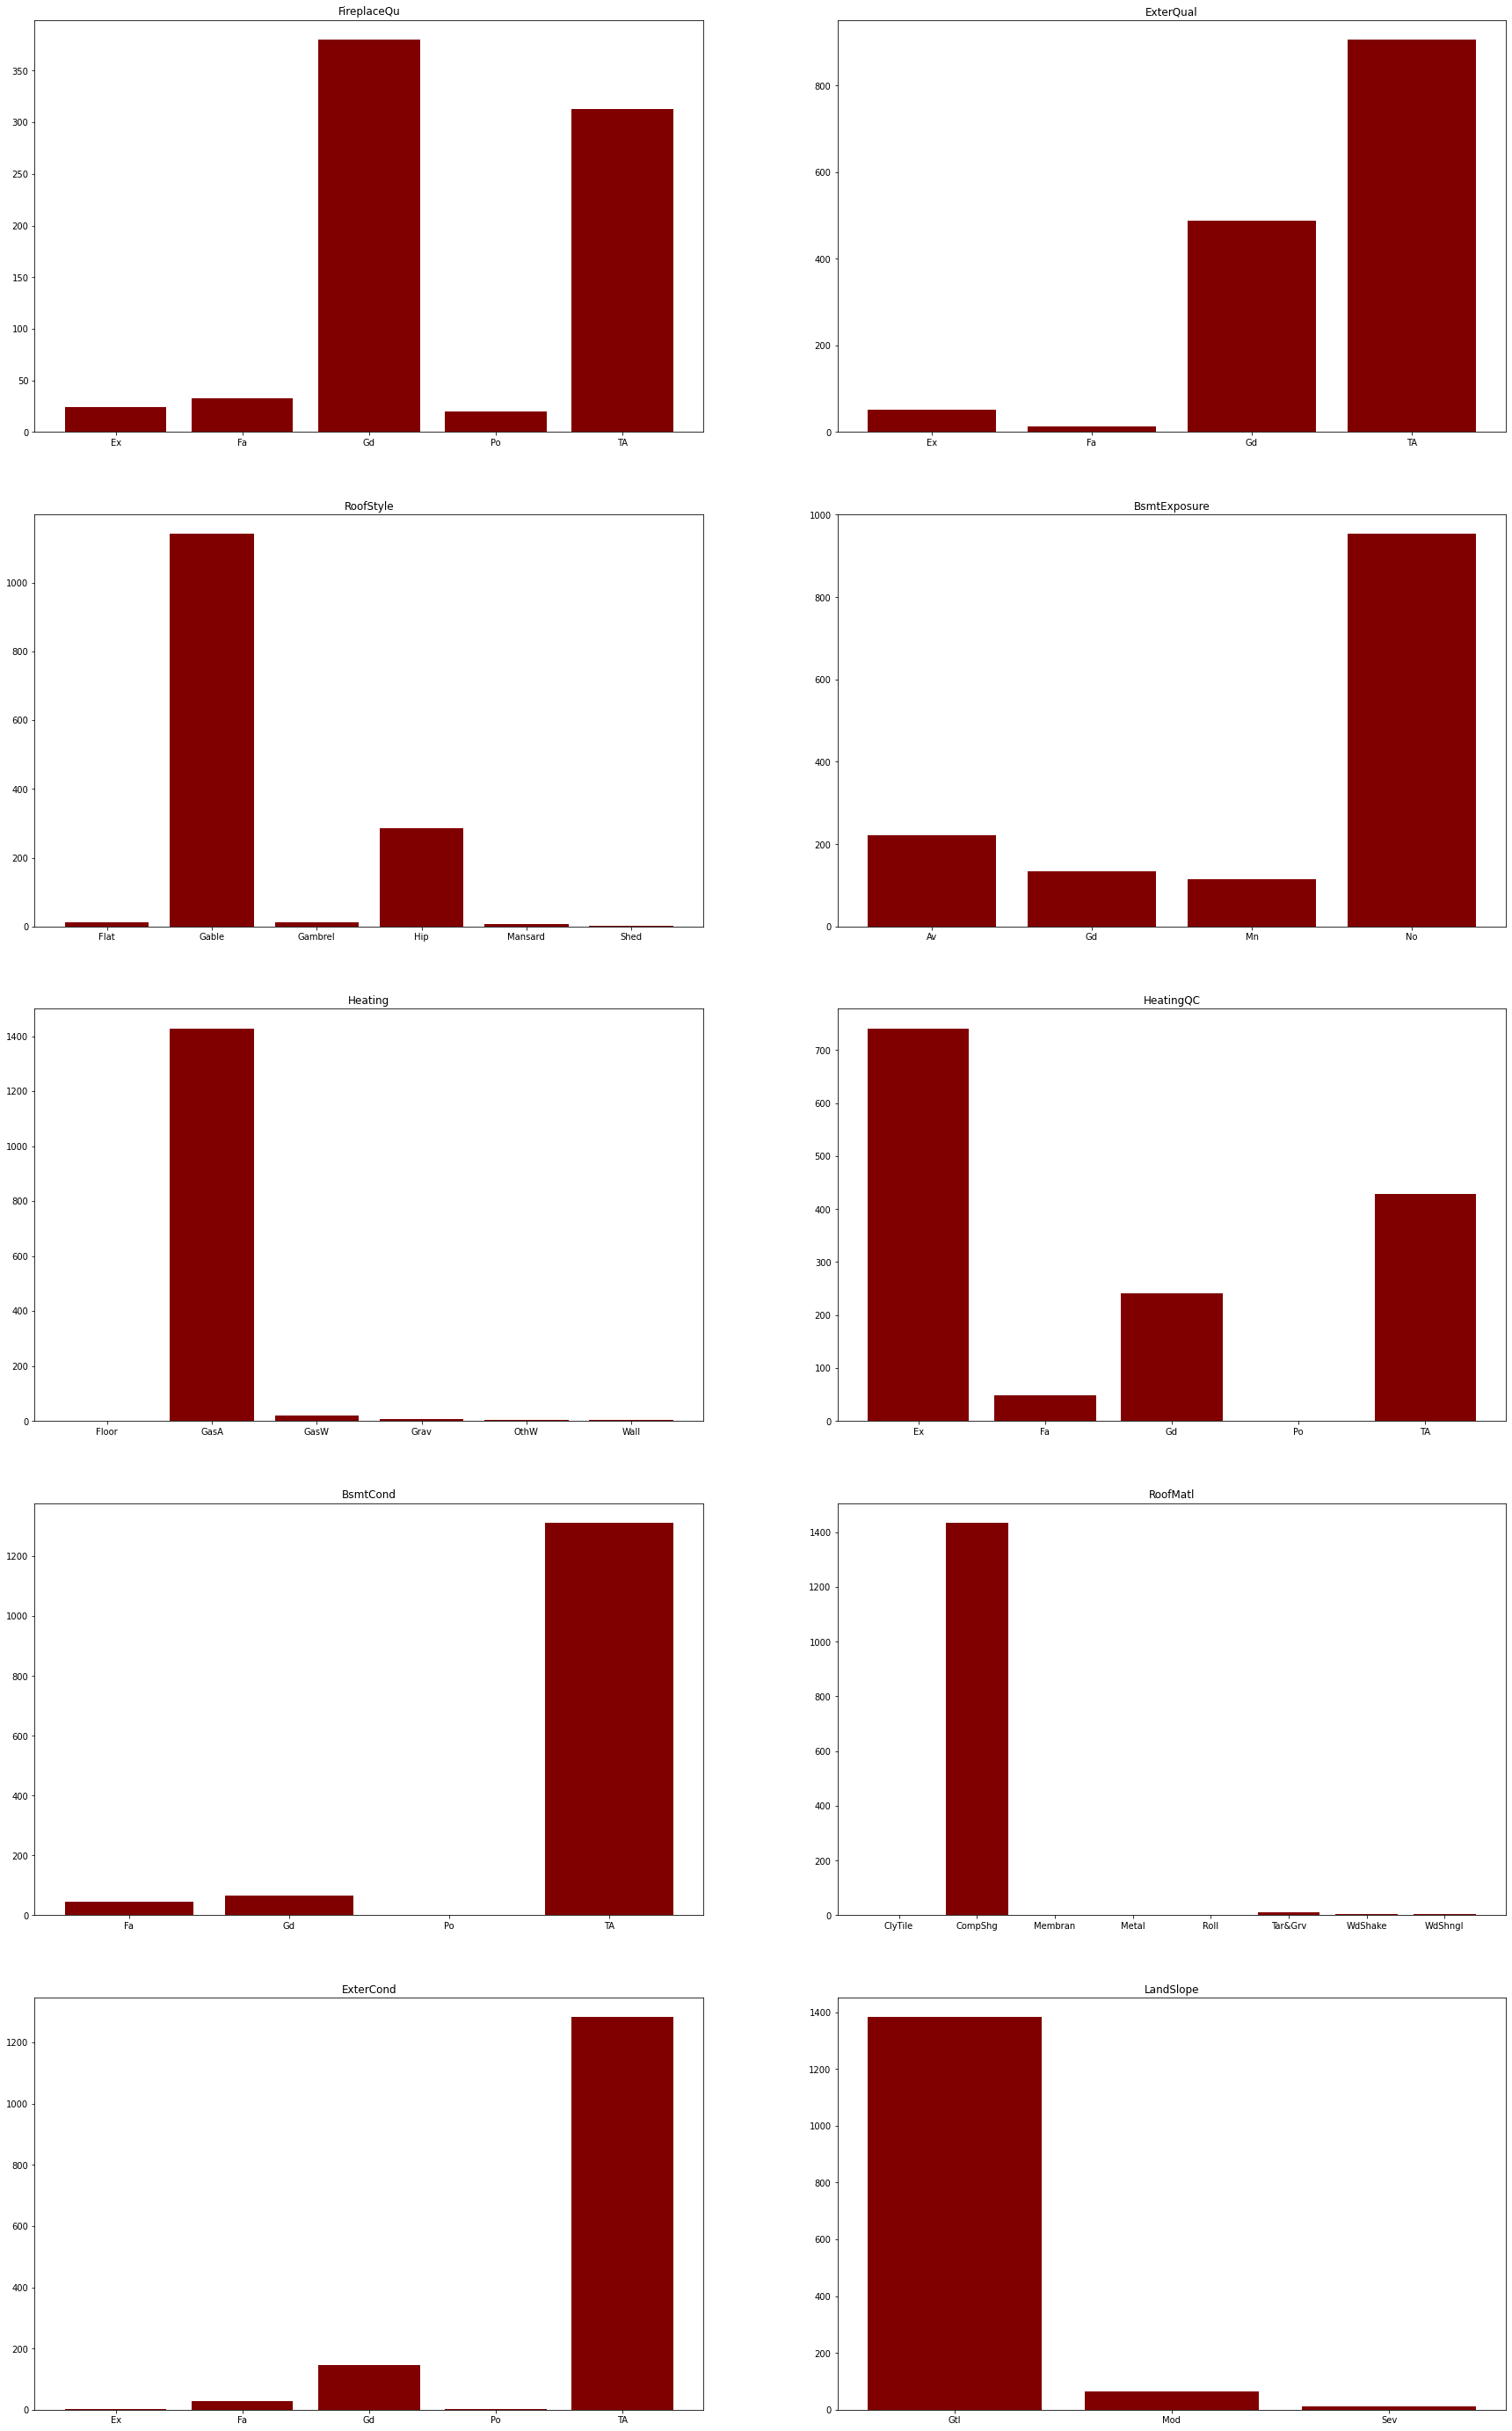

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[20:30]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

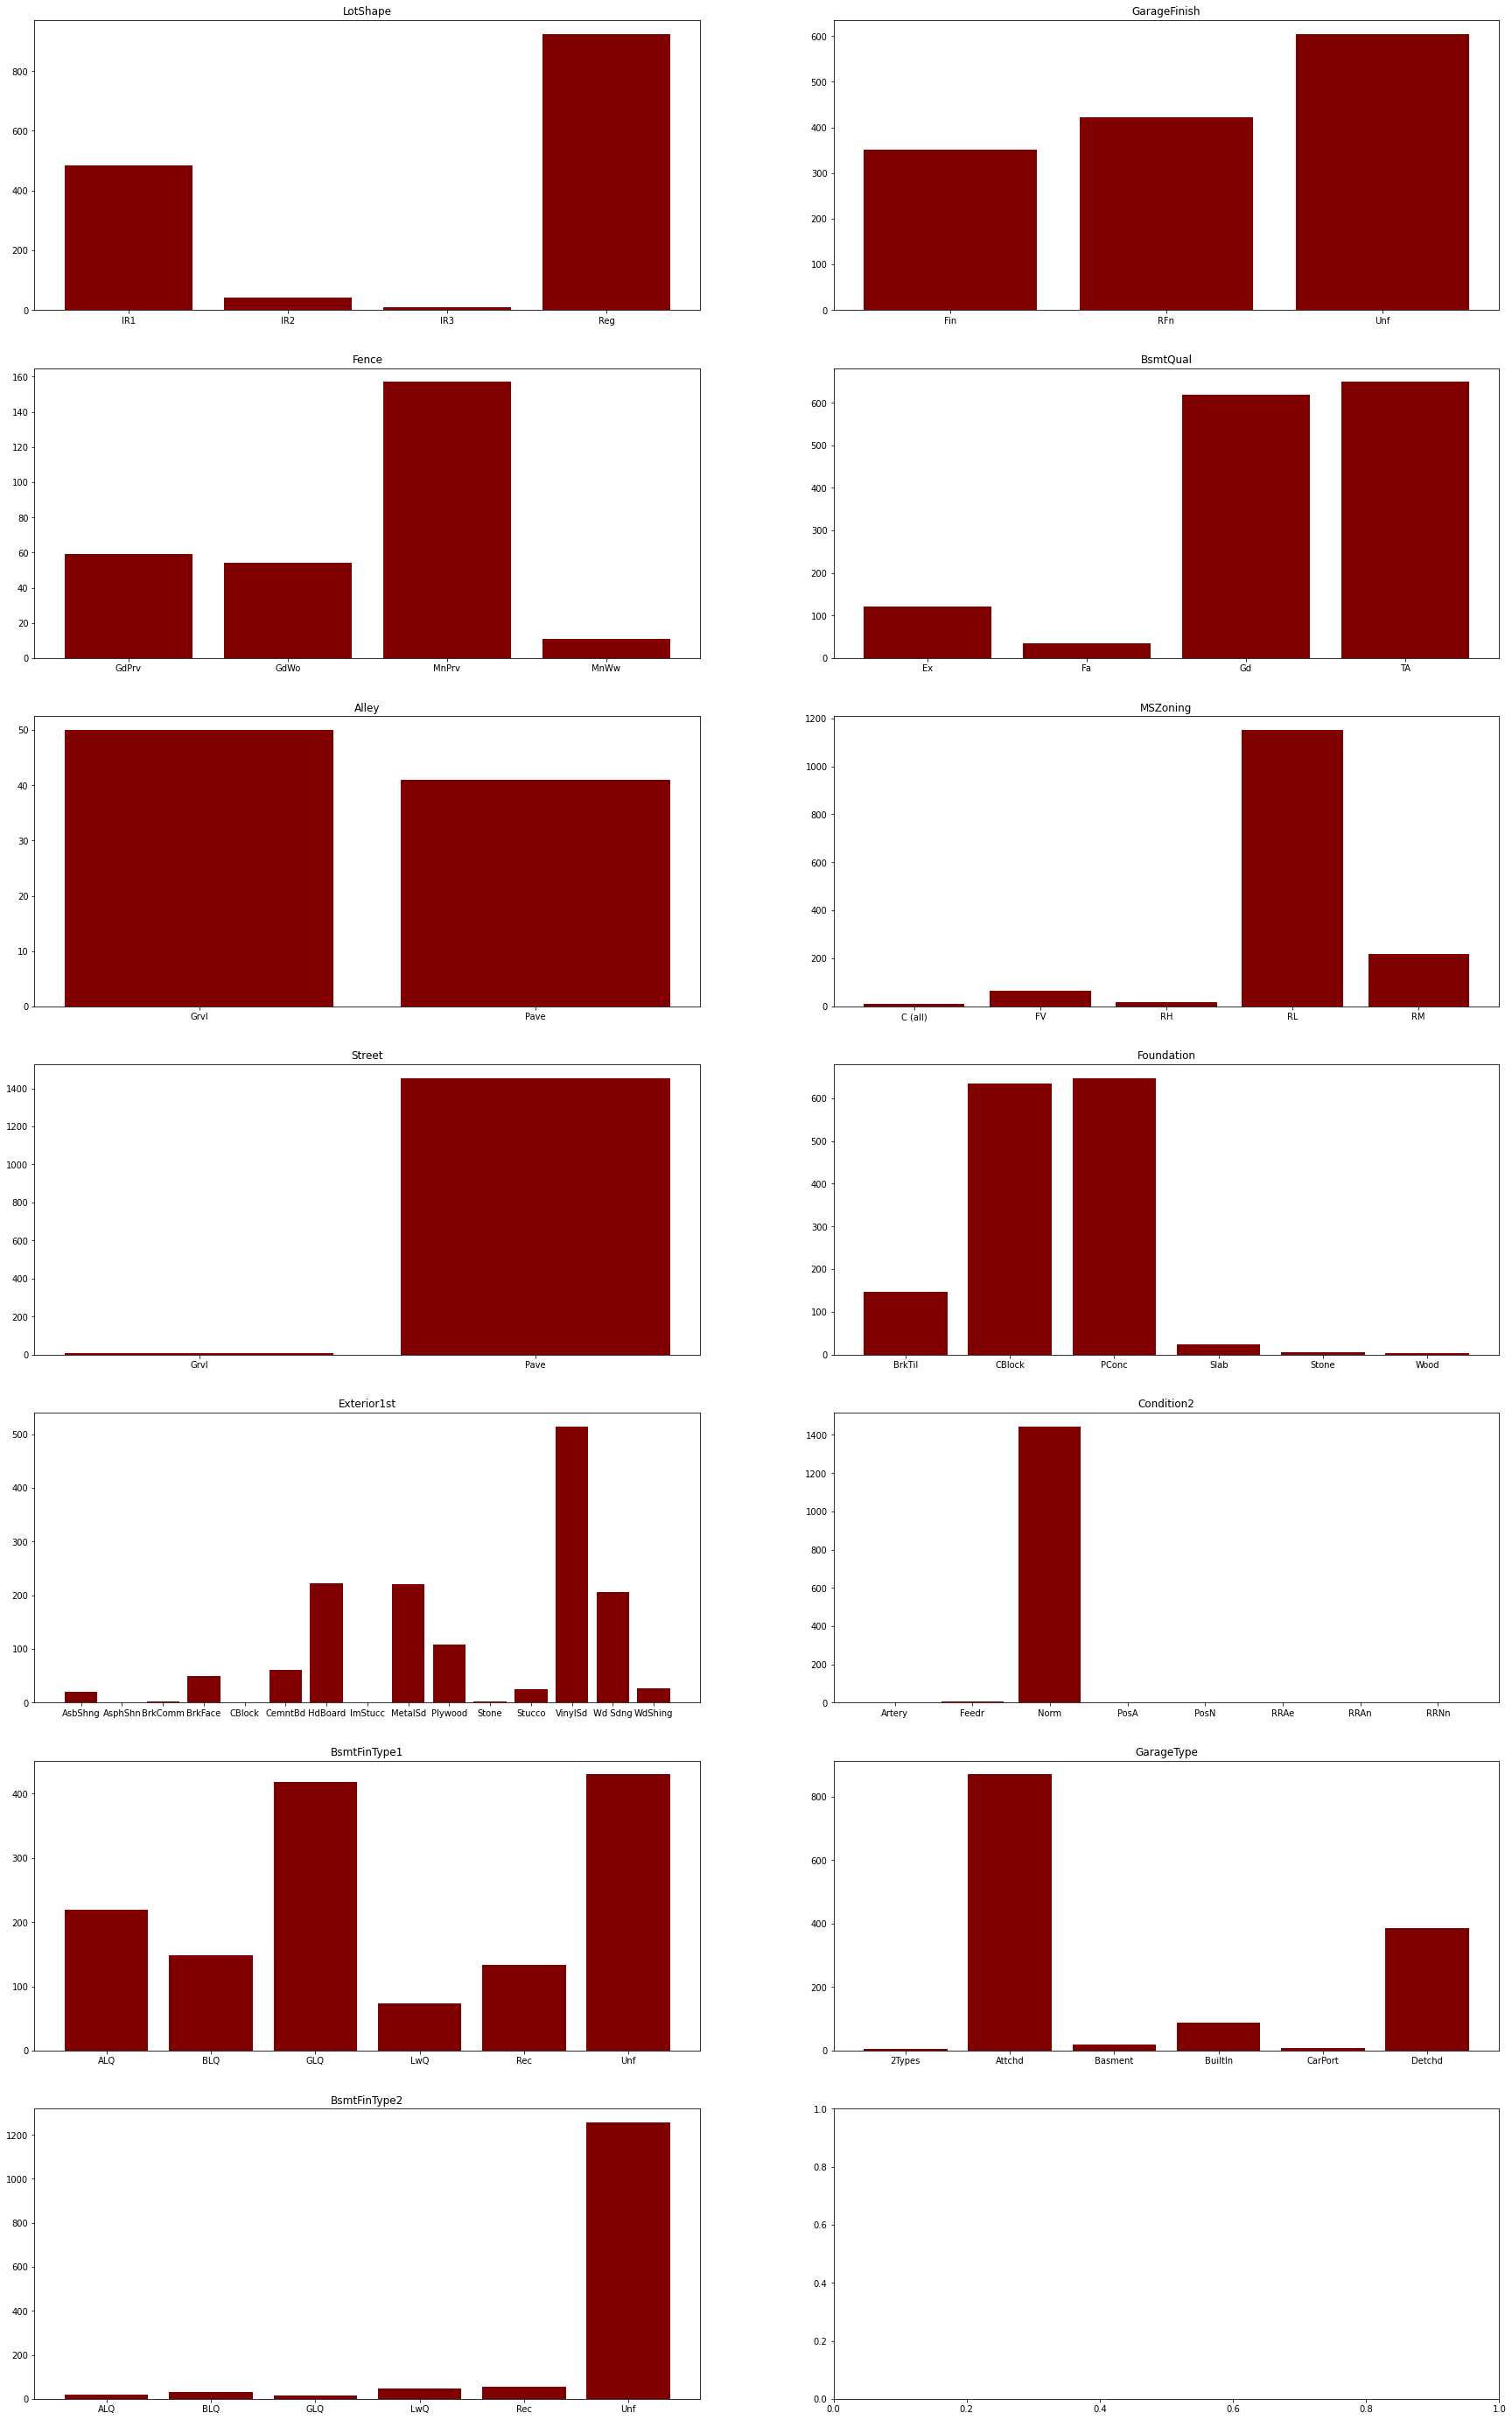

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[30:]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

# Data Pre-processing 
1- Handling Null Values

2- Dropping Features which have more than 80% of values with the same value

3- removing highly correlated features to avoid multi-collinearity as much as we can

4- removing/clamping outliers

5- transforming highly skewed data to reduce their skewness

6- checking for each features whether it follows a normal distribution or not to decide whether to standardize or min-max scale)

7- classify your categorical features into (ordinal and nominal) to decide which features will be label encoded and which features should be OHE

In [ ]:
train_data[num_cols].describe()

### Handling NULL values

In [ ]:
nulls_df = train_data.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

In [16]:
# handling NULL Values
## columns which have more than 60% of the data NULL values should be dropped
train_data = train_data.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'])

## when the number of nulls in a row is very small, we can simply drop this small number of rows
train_data = train_data.dropna(axis = 0, subset = ['GarageYrBlt', 'MasVnrArea', 'Electrical', 
                                                   'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
                                                   'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 
                                                   'BsmtQual', 'MasVnrType'])

train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [17]:
nulls_df = train_data.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


### Dropping any column which has 80% of values with the same value 

In [18]:
# making dataframes each of them contains the categories of a catgegorical variable and theire frequencies again
## separating the categorical features and numerical features
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

df_list=[]
for cat_column in cat_cols:
    df_list.append(train_data.groupby([cat_column])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

def dropping_var_wth_same_value_80_time(count_df, df):
    highest_freq_percentage = (count_df['count']/df.count()[0]).\
                        reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
    if highest_freq_percentage >= 0.8:
        print('we will drop the column ', count_df.columns[0])
        df = df.drop(columns = [count_df.columns[0]])
    return df

df_list = []
for col in list(set(train_data.columns) - set(['Id'])):
  df_list.append(train_data.groupby([col])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

In [19]:
for idx in range(len(df_list)):
  train_data = dropping_var_wth_same_value_80_time(df_list[idx], train_data)

we will drop the column  PoolArea
we will drop the column  SaleType
we will drop the column  CentralAir
we will drop the column  Functional
we will drop the column  GarageQual
we will drop the column  LandContour
we will drop the column  Electrical
we will drop the column  ScreenPorch
we will drop the column  LowQualFinSF
we will drop the column  3SsnPorch
we will drop the column  BsmtCond
we will drop the column  ExterCond
we will drop the column  KitchenAbvGr
we will drop the column  BsmtFinType2
we will drop the column  SaleCondition
we will drop the column  BldgType
we will drop the column  GarageCond
we will drop the column  BsmtHalfBath
we will drop the column  Condition1
we will drop the column  BsmtFinSF2
we will drop the column  Utilities
we will drop the column  PavedDrive
we will drop the column  Heating
we will drop the column  MiscVal
we will drop the column  RoofMatl
we will drop the column  LandSlope
we will drop the column  EnclosedPorch
we will drop the column  Street


### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

In [ ]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

# inspecting the correlation between each couple of features
num_cols_wthout_response_variable = list(set(num_cols) - set(['SalePrice']))
corr_matrix = train_data[num_cols_wthout_response_variable].corr()
corr_matrix

In [21]:
for row_idx in range(corr_matrix.values.shape[0]):
    for col_idx in range(row_idx + 1,corr_matrix.values.shape[0]):
        if (np.abs(corr_matrix.values[row_idx, col_idx]) > 0.7):
            var_row_corr_wth_response = np.abs(np.corrcoef(train_data['SalePrice'], 
                                                    train_data[num_cols_wthout_response_variable[row_idx]])[0, 1])
            var_col_corr_wth_response = np.abs(np.corrcoef(train_data['SalePrice'], 
                                                    train_data[num_cols_wthout_response_variable[col_idx]])[0, 1])
            
            if var_row_corr_wth_response > var_col_corr_wth_response:
                print('we will drop the column ', num_cols_wthout_response_variable[col_idx])
                train_data = train_data.drop(columns = [num_cols_wthout_response_variable[col_idx]])
            else:
                print('we will drop the column ', num_cols_wthout_response_variable[row_idx])
                train_data = train_data.drop(columns = [num_cols_wthout_response_variable[row_idx]])

we will drop the column  GarageArea
we will drop the column  GarageYrBlt
we will drop the column  TotRmsAbvGrd
we will drop the column  TotalBsmtSF


In [22]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

### Calmp Outliers and log-transform any highly skewed variable

In [23]:
# IQR method to clamp outliers
def outliers_clamping(col, value):
    Q1 = np.percentile(train_data[col], q = 25, interpolation = 'midpoint')
    Q3 = np.percentile(train_data[col], q = 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    Upper_Bound = Q3 + 1.5*IQR
    Lower_Bound = Q1 - 1.5*IQR
    if value > Upper_Bound:
        return Upper_Bound
    else:
        return value
    
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    df['diff_col'] = df[col] - mean_col
    df['diff_col_powered'] = np.power(df['diff_col'], 3)
    skewness = np.sum(df['diff_col_powered'])/((size_rows - 1) * np.power(std_col, 3))
    df = df.drop(columns = ['diff_col_powered', 'diff_col'])
    return skewness

def skewed_data_transformation(value, skewness):
    if (skewness >= 1 or skewness <= -1) and value >= 0:
        return np.log(1+ value)
    else:
        return value

In [24]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

for col in num_cols:
  train_data[col] = train_data[col].apply(lambda x: outliers_clamping(col, x))

for col in num_cols:
  sk = skewness_calc(col, train_data)
  train_data[col] = train_data[col].apply(lambda x: skewed_data_transformation(x, sk))

In [25]:
train_data[num_cols].describe()

,MasVnrArea,2ndFlrSF,HalfBath,BedroomAbvGr,FullBath,MoSold,Fireplaces,GarageCars,LotFrontage,YearBuilt,SalePrice,OverallQual,BsmtFullBath,OpenPorchSF,OverallCond,MSSubClass,YearRemodAdd,LotArea,BsmtFinSF1,1stFlrSF,BsmtUnfSF,GrLivArea,WoodDeckSF,YrSold
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,2.261763,357.141256,0.402840,2.864723,1.575486,6.331839,0.648729,1.87145,70.559299,1973.029148,12.063273,6.219731,0.438714,2.392413,5.596413,3.809801,1985.668909,9.118052,4.400982,7.021199,582.494768,7.286098,2.571687,2007.805680
std,2.654876,440.324982,0.504185,0.776677,0.547570,2.699437,0.645393,0.63428,20.512492,29.563540,0.376013,1.324472,0.515630,2.138606,1.078124,0.683138,20.296463,0.483740,2.931189,0.312732,439.950528,0.321974,2.605361,1.330691
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,21.000000,1880.000000,10.471978,2.000000,0.000000,0.000000,2.000000,3.044522,1950.000000,7.170888,0.000000,6.084499,0.000000,6.084499,0.000000,2006.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.00000,60.000000,1956.000000,11.813037,5.000000,0.000000,0.000000,5.000000,3.044522,1968.000000,8.954803,0.000000,6.796824,248.000000,7.057036,0.000000,2007.000000
50%,0.000000,0.000000,0.000000,3.000000,2.000000,6.000000,1.000000,2.00000,70.759598,1976.000000,12.034697,6.000000,0.000000,3.367296,5.000000,3.931826,1994.500000,9.169623,6.025863,7.002156,489.000000,7.300473,1.282475,2008.000000
75%,5.164786,740.500000,1.000000,3.000000,2.000000,8.000000,1.000000,2.00000,80.000000,2001.000000,12.301387,7.000000,1.000000,4.262680,6.000000,4.262680,2004.000000,9.372608,6.598509,7.254885,815.750000,7.491366,5.167627,2009.000000
max,6.951772,2065.000000,2.000000,6.000000,3.000000,12.000000,3.000000,4.00000,180.000000,2010.000000,13.377007,10.000000,2.000000,6.042633,9.000000,5.252273,2010.000000,10.367725,8.389133,8.297793,2336.000000,8.505525,6.754604,2010.000000


### Checking if the variable follows a normal distribution (will be standardized) or does not follow a normal distribution (will be min-max scaled)

In [26]:
## separating the categorical features and numerical features again
num_cols = list(set(train_data.describe().columns.to_list()) - set(['Id']))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols) - set(['Id']))

len(num_cols)

26

#### 1st method to check if a variable follows normal distribution (quantile-quantile plot)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


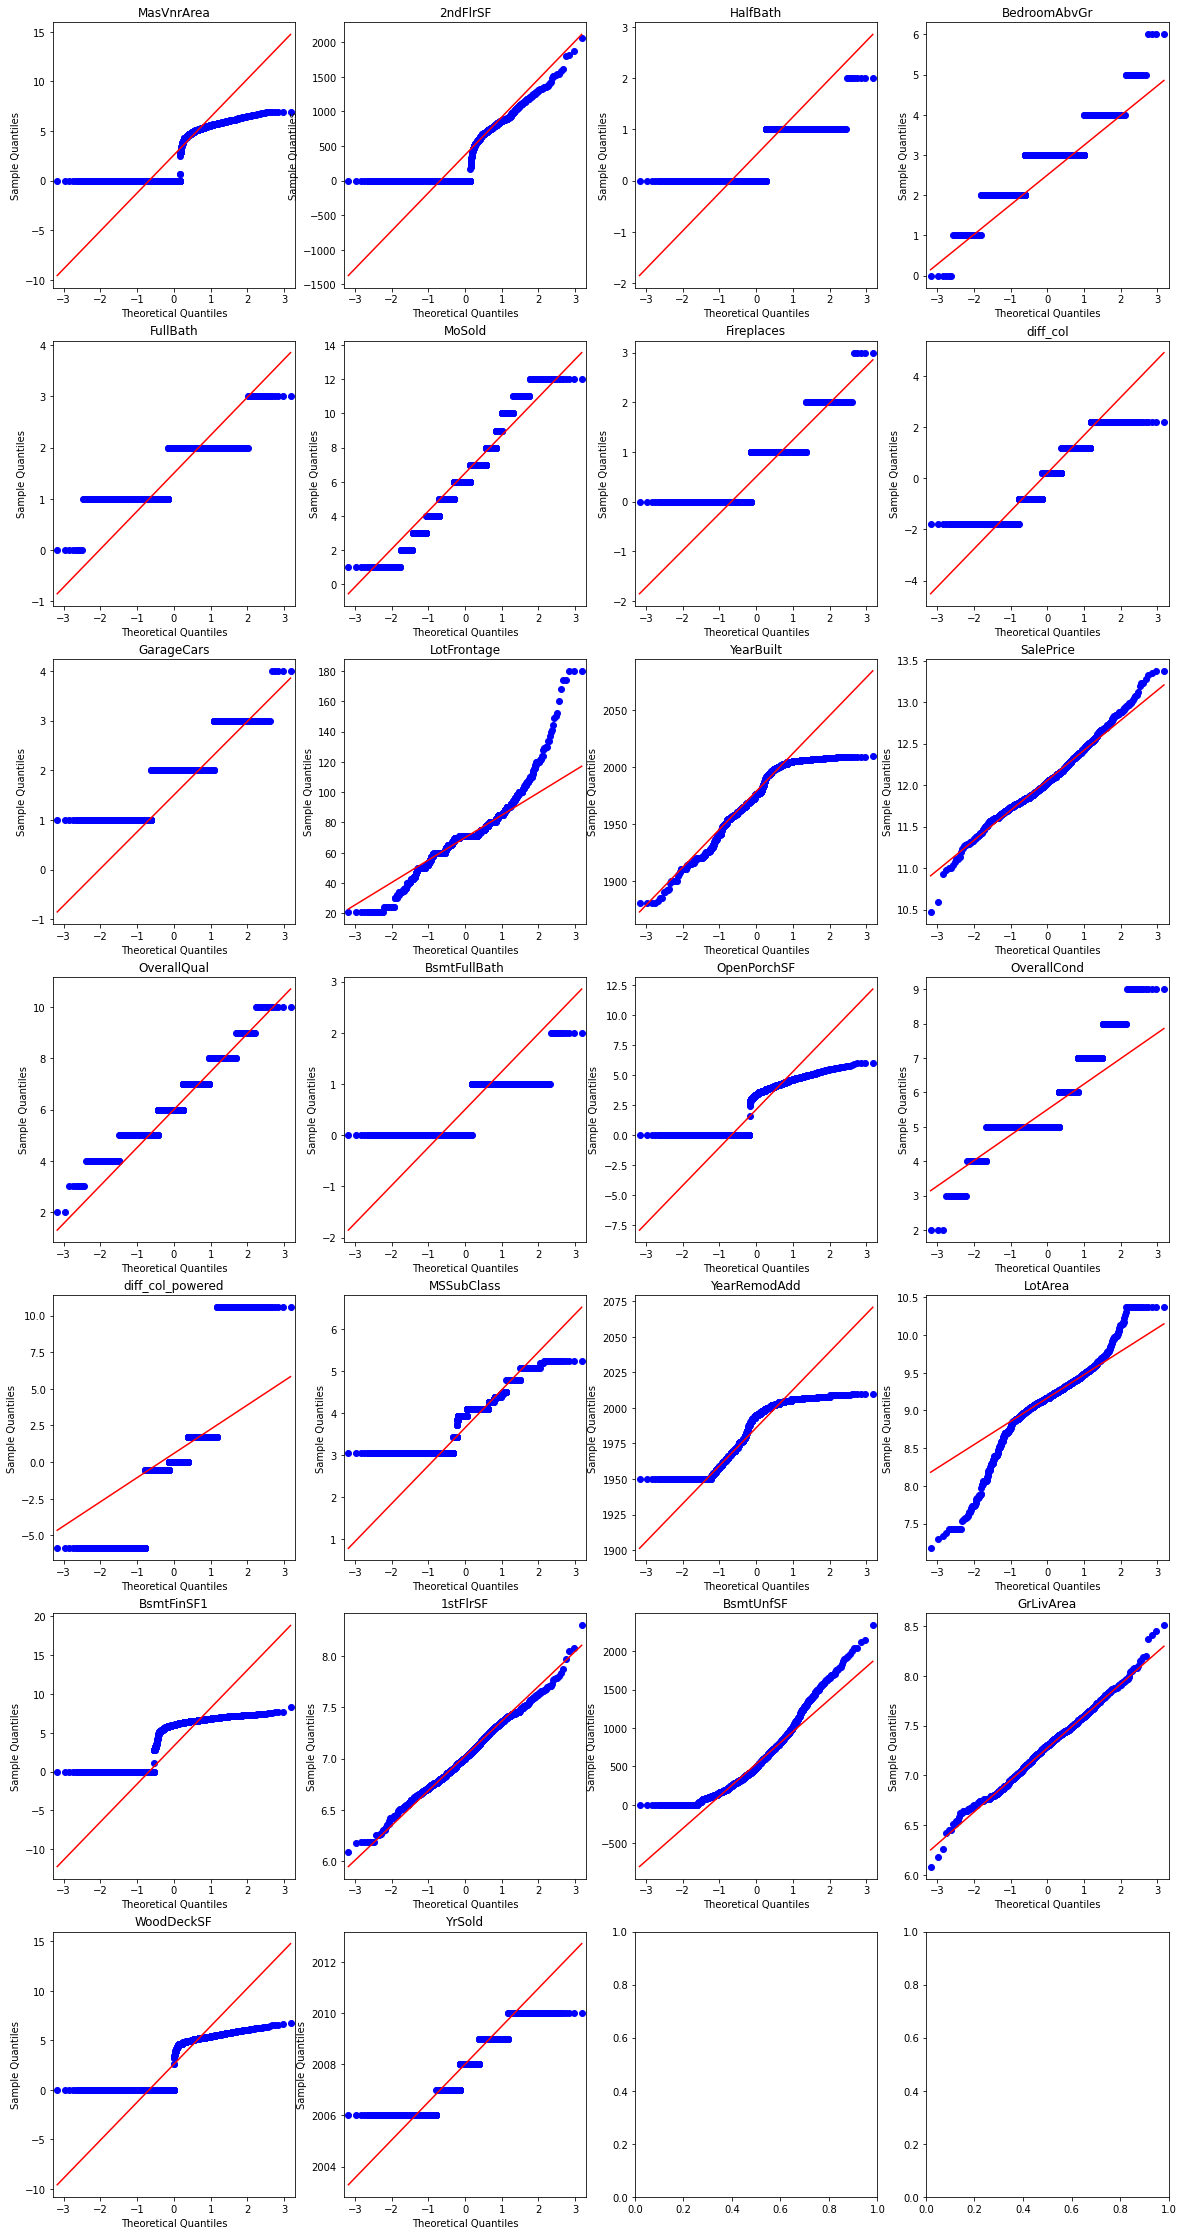

In [27]:
import statsmodels.api as sm
ncols = 4
nrows=7
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
i=0
j=0
for col in num_cols:
    sm.qqplot(train_data[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

#### 2nd method to check if a variable follows normal distribution using (Shapiro-Wilk) test

In [28]:
""" Testing the normally distributed features using Shapiro-Wilk test
 the null hypothesis here is that the data follows a normal distribution
 we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%)
 and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha """
feats_std_scale = []
feats_min_max_scale = []
from scipy.stats import shapiro
for col in num_cols:
    stat, p = shapiro(train_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.717, p=0.00000000
MasVnrArea does not look Gaussian (reject H0)
W_Statistic=0.773, p=0.00000000
2ndFlrSF does not look Gaussian (reject H0)
W_Statistic=0.643, p=0.00000000
HalfBath does not look Gaussian (reject H0)
W_Statistic=0.843, p=0.00000000
BedroomAbvGr does not look Gaussian (reject H0)
W_Statistic=0.716, p=0.00000000
FullBath does not look Gaussian (reject H0)
W_Statistic=0.969, p=0.00000000
MoSold does not look Gaussian (reject H0)
W_Statistic=0.764, p=0.00000000
Fireplaces does not look Gaussian (reject H0)
W_Statistic=0.896, p=0.00000000
diff_col does not look Gaussian (reject H0)
W_Statistic=0.784, p=0.00000000
GarageCars does not look Gaussian (reject H0)
W_Statistic=0.924, p=0.00000000
LotFrontage does not look Gaussian (reject H0)
W_Statistic=0.918, p=0.00000000
YearBuilt does not look Gaussian (reject H0)
W_Statistic=0.988, p=0.00000001
SalePrice does not look Gaussian (reject H0)
W_Statistic=0.941, p=0.00000000
OverallQual does not look Gaussian (reject 

### Min-max Scaling / Standardizing Numerical Features

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
min_max_scaled_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)

std_scaler = StandardScaler()
std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
std_scaled_data =pd.DataFrame( std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)

num_train_df = std_scaled_data.merge(min_max_scaled_data, right_index = True, left_index = True)
num_train_df

,1stFlrSF,GrLivArea,MasVnrArea,2ndFlrSF,HalfBath,BedroomAbvGr,FullBath,MoSold,Fireplaces,diff_col,GarageCars,LotFrontage,YearBuilt,SalePrice,OverallQual,BsmtFullBath,OpenPorchSF,OverallCond,diff_col_powered,MSSubClass,YearRemodAdd,LotArea,BsmtFinSF1,BsmtUnfSF,WoodDeckSF,YrSold
0,-0.856519,0.493192,0.759979,0.413559,0.5,0.500000,0.666667,0.090909,0.000000,0.50,0.333333,0.276730,0.946154,0.611258,0.625,0.5,0.683003,0.428571,0.358274,0.483003,0.883333,0.585314,0.782087,0.064212,0.000000,0.50
1,0.384007,-0.450058,0.000000,0.000000,0.0,0.500000,0.666667,0.363636,0.333333,0.25,0.333333,0.371069,0.738462,0.563519,0.500,0.0,0.000000,0.857143,0.326042,0.000000,0.433333,0.625223,0.820887,0.121575,0.843935,0.25
2,-0.626133,0.628223,0.732727,0.419370,0.5,0.500000,0.666667,0.727273,0.333333,0.50,0.333333,0.295597,0.930769,0.635172,0.625,0.5,0.622444,0.428571,0.358274,0.483003,0.866667,0.674831,0.737652,0.185788,0.000000,0.50
3,-0.486811,0.505877,0.000000,0.366102,0.0,0.500000,0.333333,0.090909,0.333333,0.00,0.666667,0.245283,0.269231,0.474152,0.625,0.5,0.593039,0.428571,0.000000,0.551764,0.333333,0.623589,0.641294,0.231164,0.000000,0.00
4,0.073042,1.272816,0.843064,0.509927,0.5,0.666667,0.666667,1.000000,0.333333,0.50,0.666667,0.396226,0.923077,0.673743,0.750,0.5,0.735218,0.428571,0.358274,0.483003,0.833333,0.748989,0.773162,0.209760,0.779126,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,-0.513523,0.376631,0.000000,0.336077,0.5,0.500000,0.666667,0.636364,0.333333,0.25,0.333333,0.257862,0.915385,0.550965,0.500,0.0,0.614562,0.428571,0.326042,0.483003,0.833333,0.564935,0.000000,0.407962,0.000000,0.25
1334,1.970588,1.090983,0.688672,0.000000,0.0,0.500000,0.666667,0.090909,0.666667,1.00,0.333333,0.402516,0.753846,0.613725,0.500,0.5,0.000000,0.571429,1.000000,0.000000,0.633333,0.724236,0.795469,0.252140,0.867250,1.00
1335,0.190871,1.467238,0.000000,0.557869,0.0,0.666667,0.666667,0.363636,0.666667,1.00,0.000000,0.283019,0.469231,0.695744,0.625,0.0,0.680312,1.000000,1.000000,0.551764,0.933333,0.606493,0.669962,0.375428,0.000000,1.00
1336,-0.119664,-0.939271,0.000000,0.000000,0.0,0.333333,0.333333,0.272727,0.000000,1.00,0.000000,0.295597,0.538462,0.479338,0.375,0.5,0.000000,0.571429,1.000000,0.000000,0.766667,0.629011,0.466320,0.000000,0.874272,1.00


### Handling Categorical features

In [30]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'MasVnrType', 'Neighborhood']

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_train_df = pd.DataFrame()
for ordinal_feat in ordinal_cats:
  label_enc_model = LabelEncoder().fit(train_data[ordinal_feat])
  ordinal_train_df[ordinal_feat] = label_enc_model.transform(train_data[ordinal_feat])

one_hot_enc_model = OneHotEncoder(sparse = False).fit(train_data[nominal_cats])
nominal_train_data = one_hot_enc_model.transform(train_data[nominal_cats])

a=one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)

### Merging the nominal_df, ordinal_df and numerical_df to get the final data that will be the input to the model, and splitting the data into train and validation sets

In [32]:
final_data = nominal_train_df.merge(ordinal_train_df, right_index = True, left_index = True, how = 'inner')\
.merge(num_train_df, right_index = True, left_index = True, how = 'inner')

In [33]:
data_y = final_data[['SalePrice']]
data_x = final_data[list(set(final_data.columns) - set(['SalePrice']))]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

## Implementing the linear regression model from scratch using the closed form solution

### Trying a naive approach that implements the closed form solution as it is on non-perfect data
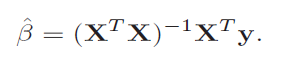

In [ ]:
# should produce an error 
x_transpose = np.transpose(X_train.values)
xT_x = np.matmul(x_transpose , X_train.values)
inverse_xT_x = np.linalg.inv(xT_x)
optimum_coefficients = np.matmul((np.matmul(inverse_xT_x, x_transpose)), y_train.values)

### Treating the previous error using the Singular Value Decomposition to calculate the pseudo-inverse of the data matrix
optimal coefficients = image.png

In [36]:
# calculating the economy svd (where the u matrix has the same size as the data matrix X, nad the sigma matrix is square matrix)
# AKA: no silent vectors in the u Matrix, so it is not square and not orthogonal (uTu = I, but uuT is != I)
def linear_reg_SVD(X, Y, zero_threshold = 1e-13):
  u, s, vT = np.linalg.svd(X, full_matrices= False)

  # Now initialize the "pseudo-"inverse of Sigma, where "pseudo" means "don't divide by zero"
  sigma_pseudo_inverse = np.zeros((vT.shape[0], vT.shape[0]))

  ## getting the index of the first approximately zero singular value
  idx_nearly_zero_sigma= np.where(s <= zero_threshold)[0][0]

  # 1/non-zero diagonal elements calculation
  sigma_pseudo_inverse[:idx_nearly_zero_sigma,:idx_nearly_zero_sigma] = np.diag(1/s[ :idx_nearly_zero_sigma])
  #the above three lines could have been calculated via:
  # sigma_pseudo_inverse = = np.linalg.pinv(np.diag(s), rcond=1e-13)

  # calculating the optimal coefficients
  optimal_coefficients = vT.T.dot(sigma_pseudo_inverse).dot(u.T).dot(Y)
  return optimal_coefficients

In [37]:
optimal_coefficients = linear_reg_SVD(X_train, y_train, zero_threshold = 1e-13)
y_hat_from_scratch = X_train.values.dot(optimal_coefficients)

### Comparing our output to the implemented solution in sklearn (which is calculated using the pseudo inverse of train data as we did above)

In [38]:
## trying the linear regression of sklearn with closed form solution approximated with the SVD as well
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [39]:
y_hat_sklearn = reg.predict(X_train)

In [40]:
y_hat_sklearn

array([[0.52973557],
       [0.42614365],
       [0.34188843],
       ...,
       [0.68030548],
       [0.58309555],
       [0.61160278]])

In [41]:
y_hat_from_scratch

array([[0.52994518],
       [0.4251141 ],
       [0.34207388],
       ...,
       [0.68031311],
       [0.5831155 ],
       [0.61155848]])